# The Battle of Neighborhood

## Business Problem

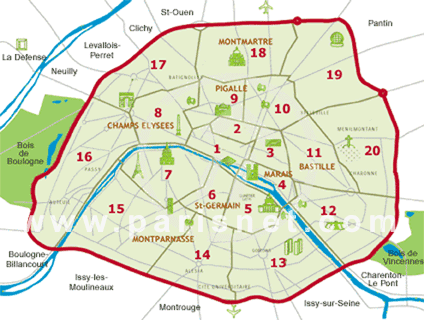

Paris is the capital and most populous city of France, with an area of 105 square kilometres (41 square miles) and an official estimated population of 2,140,526 residents as of 1 January 2019. Since the 17th century, Paris has been one of Europe's major centres of finance, diplomacy, commerce, fashion, science, and the arts. The City of Paris is the centre and seat of government of the Île-de-France, or Paris Region, which has an estimated official 2019 population of 12,213,364, or about 18 percent of the population of France.

The 20th (or XXe or vingtième) arrondissement of Paris is the last of the consecutively numbered arrondissements of the capital city of France. Also known as Ménilmontant, it is located on the right bank of the River Seine and contains the city's cosmopolitan districts Ménilmontant and Belleville. The 20th arrondissement is also internationally known for the Père Lachaise Cemetery where one can find the tombs of many famous artists. 

Our client is an entrepreneur who loves books and who wants to open a book store in the 20th arrondissement of Paris. He would like to know exactly where he can open the book store. He wants a place where the demand is high and where no many book stores are already operating.
To do so, he asked us to study the 20th arrondissement and more precisely:
    1. Define areas with low number of book stores already opened
    2. Among them, define attractive area to open the store. He would like to have schools/university close to his place because he loves to share his knowledge and recommendations.
    3. Provide any insight on these locations (workplace, schools...) that might attract customers

## Data

To solve the business problem, we would require the following data:
    1. Details about the 20th arrondissement such as population (Wikipedia)
    2. List of book shops in the 20th arrondissement, per zone (Foursquare)
    3. List of schools/colleges/universities in the area with their addresses
    4. List of the transportation accessibility to ease customer venue
    5. Details of the surroundings (venues) of the top places to open the store (Foursquare)

The data will be used as follows:
    1. Use Foursquare and geopy data to map all the book stores in the 20th arrondissement
    2. Use Foursquare and geopy data to map all the schools/college/university
    3. Use Foursquare and geopy data to map the transportation accessibility
    4. Create a map that depicts the spread of the above
    5. Study the map and define top locations for the book shop location
    
The procesing of these DATA will allow to answer the key questions to make a decision:
    1. What is the area with the best location that meets criteria established?
    2. What is the distance from work places and accessibility points 

# Study

## Visualisation of the 20th Arrondissement on the Map

In [1]:
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes
import requests 
import pandas as pd 
import numpy as np 
import random 
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import folium

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.8.28-0, anaconda::openssl-1.1.1d-he774522_2
  - anaconda::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-he774522_2
  - anaconda::openssl-1.1.1d-he774522_2, defaults::ca-certificates-2019.8.28-0
  - defaults::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-he774522_2done

# All requested packages already installed.

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.8.28-0, anaconda::openssl-1.1.1d-he774522_2
  - anaconda::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-he774522_2
  - anaconda::openssl-1.1.1d-he774522_2, defaults::ca-certificates-2019.8.28-0
  - defaults::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-he774522_2done

# All requested packages already installed.



In [2]:
CLIENT_ID = 'YFNHKAQAZKDOFPRSX5UOTSGUXUYD3FTW2EN3QH4TWX43CTUZ' # your Foursquare ID
CLIENT_SECRET = 'ZH3SADLN0MFX12OJYD5RCNW4ER2EMXDWJ2J4B4YPNMU0R2TV' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 2000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YFNHKAQAZKDOFPRSX5UOTSGUXUYD3FTW2EN3QH4TWX43CTUZ
CLIENT_SECRET:ZH3SADLN0MFX12OJYD5RCNW4ER2EMXDWJ2J4B4YPNMU0R2TV


In [3]:
address = '75020'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

48.8624586736304 2.40053947528966


In [4]:
map_Paris = folium.Map(location = [latitude, longitude], zoom_start = 15)
map_Paris

## Book Shops Extraction & Visualisation on the Map

In [15]:
search_query = 'librairie'
radius = 1000
print(search_query + ' .... OK!')

Lycée .... OK!


In [16]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head(50)

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,513b9096e4b0e75b72cb08f6,Restaurant du Lycée,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",v-1576161546,False,68 boulevard de Ménilmontant,48.863945,2.386686,"[{'label': 'display', 'lat': 48.86394545035831...",1027,75020,FR,Paris,Île-de-France,France,"[68 boulevard de Ménilmontant, 75020 Paris, Fr..."
1,4e96925d77c83a33157c3290,Lycée Charles De Gaulle,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1576161546,False,17 Rue Ligner,48.858073,2.397488,"[{'label': 'display', 'lat': 48.8580734231506,...",536,75020,FR,Paris,Île-de-France,France,"[17 Rue Ligner, 75020 Paris, France]"
2,4c7fca8e0f13a1433c856a0d,Lycée Voltaire,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1576161546,False,101 avenue de la République,48.863910,2.384687,"[{'label': 'display', 'lat': 48.86391016055883...",1172,75011,FR,Paris,Île-de-France,France,"[101 avenue de la République, 75011 Paris, Fra..."
3,56535c0a498e5b9502e967cd,Lycée des métiers Dorian,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1576161546,False,74 avenue Philippe-Auguste,48.854193,2.392675,"[{'label': 'display', 'lat': 48.85419298667213...",1085,75011,FR,Paris,Île-de-France,France,"[74 avenue Philippe-Auguste, 75011 Paris, France]"
4,50b5f959e4b089a278938592,Cantine du Lycée Dorian,"[{'id': '4bf58dd8d48988d1a1941735', 'name': 'C...",v-1576161546,False,Lycée Dorian,48.854226,2.393367,"[{'label': 'display', 'lat': 48.85422569930495...",1056,75011,FR,Paris,Île-de-France,France,"[Lycée Dorian, 75011 Paris, France]"
5,4d6e1f6affedf04d2c105ec5,Infirmerie Lycée Voltaire,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",v-1576161546,False,Lycée Voltaire,48.863506,2.384799,"[{'label': 'display', 'lat': 48.863506, 'lng':...",1158,75011,FR,Paris,Île-de-France,France,"[Lycée Voltaire, 75011 Paris, France]"


In [7]:
df_clean = dataframe[['name','location.address','location.lat', 'location.lng','location.postalCode']]

In [8]:
df_clean = df_clean.rename(columns={"name": "Name", "location.address": "location","location.lat":"lat","location.lng":"long", "location.postalCode": "Arrondissement"})
df_clean

,Name,location,lat,long,Arrondissement
0,Librairie Papeterie Presse,2 rue du Surmelin,48.868049,2.401795,75020
1,Librairie de l’Irma,22 rue Soleillet,48.865484,2.393319,75020
2,Librairie des Gâtines,NaN,48.863748,2.399051,NaN
3,La Toute Petite Librairie,2 rue Étienne Marey,48.866557,2.406411,75020
4,Librairie Mona Lisait,259 rue des Pyrénées,48.866780,2.396845,75020
5,Librairie Nation,36 Boulevard de Charonne,48.855362,2.398855,75020
6,Librairie Le Monte-en-l'air,2 rue de la Mare,48.868418,2.388233,75020
7,Librairie Biret,152 avenue des Champs-Élysées,48.851651,2.403476,75008
8,A Tout Lire,141 avenue Gambetta,48.868986,2.402495,75020


In [9]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Center of 20th arrondissement',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

# add popular spots to the map as blue circle markers
for lat, lng in zip(df_clean.lat, df_clean.long):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup='Book shop',
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map

venues_map

## High Schools & University Extraction and Visualisation on the Map

In [24]:
list_school = ['lycée', 'Université', 'Collège', 'faculté', 'école']
radius = 1000
df_prel = pd.DataFrame()
for i in list_school:
    print(i)
    search_query = i
    
    
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    df_prel = json_normalize(venues)
    print(df_prel)
    dataframe_school = dataframe_school.append(df_prel,ignore_index=True, sort=False)

df_school_clean = dataframe_school[['name','location.address','location.lat', 'location.lng','location.postalCode']]
df_school_clean = df_school_clean.rename(columns={"name": "Name", "location.address": "location","location.lat":"lat","location.lng":"long", "location.postalCode": "Arrondissement"})
df_school_clean

lycée
                         id                       name  \
0  513b9096e4b0e75b72cb08f6        Restaurant du Lycée   
1  4e96925d77c83a33157c3290    Lycée Charles De Gaulle   
2  4c7fca8e0f13a1433c856a0d             Lycée Voltaire   
3  56535c0a498e5b9502e967cd   Lycée des métiers Dorian   
4  50b5f959e4b089a278938592    Cantine du Lycée Dorian   
5  4d6e1f6affedf04d2c105ec5  Infirmerie Lycée Voltaire   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d115941735', 'name': 'M...  v-1576161880    False   
1  [{'id': '4bf58dd8d48988d13d941735', 'name': 'H...  v-1576161880    False   
2  [{'id': '4bf58dd8d48988d13d941735', 'name': 'H...  v-1576161880    False   
3  [{'id': '4bf58dd8d48988d13d941735', 'name': 'H...  v-1576161880    False   
4  [{'id': '4bf58dd8d48988d1a1941735', 'name': 'C...  v-1576161880    False   
5  [{'id': '4bf58dd8d48988d104941735', 'name': 'M...  v-1576161880    False   

               location.address  

,Name,location,lat,long,Arrondissement
0,Lycée Charles De Gaulle,17 Rue Ligner,48.858073,2.397488,75020
1,Lycée Charles De Gaulle,17 Rue Ligner,48.858073,2.397488,75020
2,Restaurant du Lycée,68 boulevard de Ménilmontant,48.863945,2.386686,75020
3,Lycée Charles De Gaulle,17 Rue Ligner,48.858073,2.397488,75020
4,Lycée Voltaire,101 avenue de la République,48.863910,2.384687,75011
...,...,...,...,...,...
85,Ecole Elémentaire,9 rue de la Plaine,48.850046,2.401592,75020
86,PERL - École des Roches,6 Rue Spinoza,48.863658,2.386127,NaN
87,Église Notre-Dame de la Croix,3 place de Ménilmontant,48.868558,2.387268,75020
88,Doranco,12 Rue Planchat,48.852624,2.399338,75020


In [48]:
df_school_clean.drop_duplicates()
df_school_clean.drop([2,6,7,14,18,19,26,30,31,68,79,82,84,87,88,89],axis=0, inplace = True)
df_school_clean

,Name,location,lat,long,Arrondissement
0,Lycée Charles De Gaulle,17 Rue Ligner,48.858073,2.397488,75020
1,Lycée Charles De Gaulle,17 Rue Ligner,48.858073,2.397488,75020
3,Lycée Charles De Gaulle,17 Rue Ligner,48.858073,2.397488,75020
4,Lycée Voltaire,101 avenue de la République,48.863910,2.384687,75011
5,Lycée des métiers Dorian,74 avenue Philippe-Auguste,48.854193,2.392675,75011
...,...,...,...,...,...
80,École Elémentaire Pierre Foncin,Rue Foncin,48.870618,2.407750,75020
81,École des Cendriers,rue des Cendriers,48.865302,2.385623,NaN
83,Ecole élémentaire Alexandre Dumas,39 Rue Alexandre Dumas,48.853504,2.392862,75011
85,Ecole Elémentaire,9 rue de la Plaine,48.850046,2.401592,75020


In [59]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around Ecco


# add popular spots to the map as blue circle markers
for lat, lng in zip(df_clean.lat, df_clean.long):
    folium.features.CircleMarker(
        [lat, lng],
        radius=50,
        popup='Book shop',
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.2
        ).add_to(venues_map)
    
    # add popular spots to the map as green circle markers
for lat, lng in zip(df_school_clean.lat, df_school_clean.long):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup='School',
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map

venues_map

## Definition Of Interesting Area to Locate our Book Shop

The above figure shows the book shop already operating in the area.
The circles were drawn with a radius of 50m. The place where to locate our book shop cannot be too close to a bookshop already installed. We will avoid to get concurrence in these areas.
We can see two areas where there are many schools/university/high schools but where there are no bookshops.
Let draw them on the map and study more closely these places.

In [58]:
place1 = [48.863588, 2.389000]
place2 = [48.855975, 2.408276]

venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around Ecco


# add popular spots to the map as blue circle markers
for lat, lng in zip(df_clean.lat, df_clean.long):
    folium.features.CircleMarker(
        [lat, lng],
        radius=50,
        popup='Book shop',
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.2
        ).add_to(venues_map)
    
    # add popular spots to the map as green circle markers
for lat, lng in zip(df_school_clean.lat, df_school_clean.long):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup='School',
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.6
        ).add_to(venues_map)
    
# add Ecco as a red circle mark
folium.features.CircleMarker(
    [place1[0], place1[1]],
    radius=50,
    popup='place 1',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.2
    ).add_to(venues_map)

# add Ecco as a red circle mark
folium.features.CircleMarker(
    [place2[0], place2[1]],
    radius=50,
    popup='place 2',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.2
    ).add_to(venues_map)

# display map

venues_map

Let's study more these 2 places and see what type of venues there are in a 100m radius circle